In [1]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy
import requests
from bs4 import BeautifulSoup

# Termodinâmica avançada

## Introdução

Esse trabalho será realizado durante a disciplina de termodinâmica avançada da Ilum escola de Ciência. O problema proposto é entender e estudar conceitos de potenciais termodinâmicos e interações moleculares a partir do estudo do Ciclo de Rankine. O ciclo Rankine é um processo termodinâmico que é a base de usinas a vapor que geram energia elétrica. Esse ciclo é constituído das seguintes etapas: i) um fluído de alta pressão é bombeado para dentro do ciclo (ii) e entra em uma caldeira, onde calor é adicionado a pressão constante para o líquido comprimido. iii) o vapor atinge a turbina, onde se expande adiabaticamente, esfria e acaba na pressão baixa original. (iv) Finalmente, o fluido parcialmente condensado é resfriado ainda mais em um condensador (Schroeder, 2000)(Miller, 2011).

Além disso, como observável no diagrama abaixo, outras fases anteriores e posteriores ao ciclo de Rankine também serão estudados. 

![Diagrama representativo](imagem/diagrama.png)
<center><b>Imagem 1</b> - Esquema que representa o trabalho a ser desenvolvido ao longo do semestre</center>


## Primeiro desafio

O primeiro desafio proposto é a escolha de uma mistura com potencial para fornecimento de energia ao ciclo Rankine (responsável pela geração de energia elétrica). A mistura escolhida pela dupla foi o Pentano(C<sub>5</sub>H<sub>12</sub>) e o Benzeno(C<sub>6</sub>H<sub>6</sub>).

Para escolher a mistura adequada, foram considerados quatro critérios principais. O primeiro critério foi a entalpia, que mede a energia térmica envolvida na mistura. A entalpia que iremos utilizar para determinar a mistura é a entalpia de combustão, isso porque no processo descrito na imagem 1, no desafio 3 terá a queima da mistura para aquecer o boiler, logo precisaremos da energia gerada por esse processo. A entalpia de combustão é um valor utilizado para medir a energia total liberada em forma de calor quando a substâncias sofre combustão completa em presença de oxigênio em condições padrão. De acordo com o webbook o [benzeno](https://webbook.nist.gov/cgi/inchi?ID=C71432&Mask=2) possue entalpia de combustão de $-3267 \pm 20$, e o [pentano](https://webbook.nist.gov/cgi/cbook.cgi?ID=C109660&Mask=1) de $-3535.4 \pm  0.96$.

O segundo critério foi a disponibilidade de um diagrama de fases para a mistura, que nos dá a relação entre as fases de uma substância em várias temperaturas e pressões (McQuaire e Simon, 1957) . Esse diagrama será essencial nas próximas etapas do trabalho. Como não haverá experimentos para coletar os dados, é necessário ter um diagrama de fases pronto para viabilizar os estudos. O diagra está mostrado na Imagem 2.

  ![Diagrama de fase.](imagem/diagrama_fases.png)
  
<center> <b>Imagem 2 </b> - Diagrama de fases da mistura. <b>Fonte:</b> Panfilov e Koldoba, 2016</center>

Seguindo a mesma linha, o terceiro critério foi a "popularidade" dos componentes da mistura. Optamos por utilizar benzeno e pentano, substâncias amplamente conhecidas e estudadas, cujas informações são facilmente acessíveis. Isso facilitará a obtenção dos dados necessários para o projeto, como a entalpia.

Por fim, o quarto critério foi o baixo ponto de vaporização dos elementos da mistura. O Ciclo Rankine funciona a partir da energia gerada pelo vapor, de modo que quanto menor a temperatura de vaporização, menor será a energia necessária para aquecer e vaporizar a mistura. Tanto o benzeno quanto o pentano apresentam pontos de vaporização relativamente baixos, o que os torna bons candidatos para aplicação no Ciclo Rankine. A temperatura de vaporização do benzeno é 80.1°C e do pentano é 36.1°C (quase em temperatura ambiente).


## Referências

[1] Schroeder, Daniel V. (2000). An introduction to thermal physics. San Francisco, CA: Addison Wesley. 

[2] MILLER, Bruce G. Clean Coal Technologies for Advanced Power Generation. In: MILLER, Bruce G. Clean Coal Engineering Technology. Butterworth-Heinemann, 2011. p. 251-300.

[2] Benzene. Disponível em: <https://webbook.nist.gov/cgi/inchi?ID=C71432&Mask=2>. Acesso em: 22 mar. 2023.

[3] Pentane. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C109660&Mask=1>. Acesso em: 22 mar. 2023.

[4] McQuarrie, Donald A. (Donald Allan). Physical Chemistry : a Molecular Approach. Sausalito, Calif. University Science Books, 1997.

[5] PANFILOV, Mikhail; KOLDOBA, Alexandre. Kelvin’s Dissymmetric Models and Consistency Conditions of Multicomponent Gas-Liquid Equilibrium and Capillary Condensation. Journal of Thermodynamics, v. 2016, p. 1–21, 2016. Disponível em: <https://www.hindawi.com/journals/jther/2016/3806364/>. Acesso em: 22 mar. 2023. 


-------

## Segundo desafio


-------

Para seguirmos no ciclo de Rankine, temos o segundo desafio que nos dá as variáveis envolvidas nos processos termodinâmicos que fornecerão energia ao ciclo Rankine. O enfoque dessa atividade é analisar a separação dos líquidos na mistura e a evaporação do combustível, informações que serão essenciais para entender a entrada e ação do combustível no ciclo de fato.

Para iniciarmos nossos estudos, utilizamos dados teóricos [6] (http://www.vle-calc.com/phase_diagram.html) para plotar um diagrama de fases que forneça a temperatura pela molaridade da mistura, diferente do diagrama utilizado no desafio anterior. 

### Diagrama de fases Benzeno e Pentano

In [2]:
df_diagrama=pd.read_csv("dados/dados_diagrama.txt")

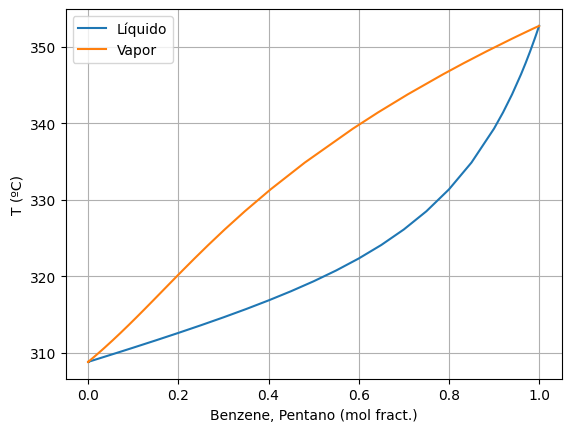

In [3]:
plt.plot(df_diagrama[" x1 "].values,df_diagrama["Temperature"].values,label='Líquido')
plt.plot(df_diagrama[" y1"].values,df_diagrama["Temperature"].values,label='Vapor')
plt.ylabel("T (ºC)")
plt.xlabel("Benzene, Pentano (mol fract.)")
plt.legend()
plt.grid()
plt.show()

A partir desse gráfico, conseguiremos realizar a separação da mistura que explicaremos a seguir.

------------

### Volume da mistura de líquidos
Nessa etapa, queremos descobrir qual será o volume total da mistura se considerarmos a massa como uma tonelada.
O volume final da mistura é dado por:
$$ V = v_{p1}  n_1 + v_{p2}  n_1$$

Podemos simpliicar essa equação se dividirmos tudo pelo número total molar, com isso teremos o volume em função de uma concentração de componentes $x_1$ para o componente 1 e $x_2$ para o componente 2.

Ficamos com a fórmula:

$$ V = \frac{x_1Mm}{d}+\frac{x_2Mm}{d}$$ 


sendo, $x_1$ a concentração do primeiro composto e $x_2$ a concentração do segundo composto, $Mm$ a massa molar e $d$ a densidade. O valor de $x_n$ é dado por $x_1 = \frac{n_1}{n_1+n_2}$ sendo o $n_1$ o número de mols do primeiro componente e $n_q + n_2$ o número total de mols do sistema. Utilizaremos o $x_1$ e $x_2$ como os valores arbitrários da porcentagem de massa de cada um dos componentes no sistema.

Não está disponível na literatura o valor da densidade da mistura, que é um valor experimental, por isso, vamos utilizar a densidade de cada um dos componentes. Os valores de densidade que encontramos para os compostos consideramos a temperatura no ponto de ebulição da cada componente, sendo o do pentano **309.2 K** e do benzeno **353.3 K**,  além disso, consideramos a pressão atmosferica, **0.1014 MPa**, dessa forma, nosso cálculo não precisa considerar o acréscimo de pressão [7], [8].

Dessa forma, a densidade de cada componente da mistura é:

In [4]:
densidade_pentano = 2.9736 #kg/m3 
densidade_benzeno = 2.7961 #kg/m3
massa_total = 1000 #kg

def densidade_da_mistura(densidade1, densidade2, massa_total, x1):
    """Calcula a densidade da mistura.
    Args:
        densidade1: densidade do pentano.
        densidade2: densidade do benzeno.
        massa_total: massa total da mistura.
        x1: fração molar da mistura.
    Return:
        densidade_da_mistura: densidade da mistura.
        """
    massa_pentano = massa_total * x1
    massa_benzeno = massa_total - massa_pentano
    
    densidade_da_mistura = (massa_pentano / (massa_total / densidade1)) + (massa_benzeno / (massa_total / densidade2))
    return densidade_da_mistura

In [5]:
densidade_mistura = densidade_da_mistura(densidade_pentano, densidade_benzeno, massa_total, 0.7)
print(densidade_mistura, "kg/m³")

2.92035 kg/m³


Agora, podemos encontrar o volume total a partir da fórmula acima:

In [6]:
x1 = 0.7  # % massa
x2 = 0.3  # % massa
Mm1 = 72.149  # g/mol
Mm2 = 78.112  # g/mol


def volume_total(x1, x2, Mm1, Mm2, densidade_da_mistura):
    volume_pentano = (x1 * Mm1) / (densidade_da_mistura/1000)
    volume_benzeno = (x2 * Mm2) / (densidade_da_mistura/1000)
    volume_total = volume_pentano + volume_benzeno

    return volume_pentano, volume_benzeno, volume_total


volume_pentano, volume_benzeno, valor_volume_total = volume_total(
    x1, x2, Mm1, Mm2, densidade_mistura
)
print(f"O valor do volume de pentano é {volume_pentano} m³/mol\n")
print(f"O valor do volume de benzeno é {volume_benzeno} m³/mol\n")
print(f"O valor do volume total é {valor_volume_total} m³/mol")

O valor do volume de pentano é 17293.920249285187 m³/mol

O valor do volume de benzeno é 8024.243669423186 m³/mol

O valor do volume total é 25318.16391870837 m³/mol


------------

### Determinação da separação da mistura.

Para realizar a separação da mistura de benzeno e do pentano utilizaremos da destilação em lote que consiste em esquentar a mistura em uma determinada temperatura, sendo assim o líquido mais volátil ira evaporar primeiro, que no nosso caso é o pentano, o elemento de interesse. Depois de evaporar e condensar essa fração, temos duas misturas com valores de concentração diferentes dos originais. Para uma solução pura do pentano, é preciso evaporar novamente até que sobre apenas o pentano.

### Pressão de vapor.

A pressão de vapor é a pressão exercida por um vapor em equilíbrio com o mesmo em sua fase líquida em uma determinada temperatura. Os gráficos abaixo representam a pressão de vapor de cada elemento da mistura com base na temperatura, o último gráfico é a plotagem dos dois juntos apenas para melhor visualização.

Esse dado é de estrema importância para a destilação em lotes, isso porque podemos analisar qual elemento da mistura ira evaporar antes, mais volátil. 

#### Pressão de vapor do benzeno

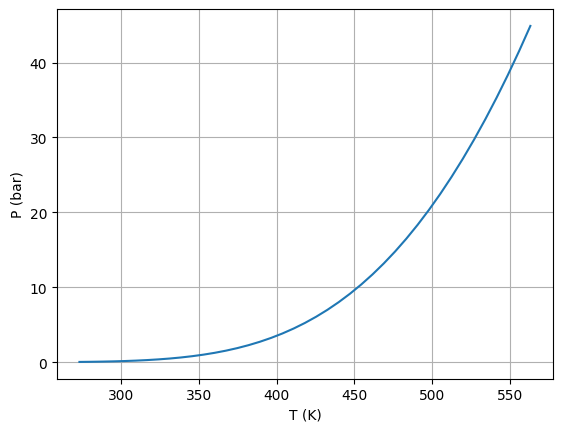

In [7]:
pressão_vapor_benzeno = pd.read_csv("dados/pressão_vapor_benzeno.txt").drop(0,axis=0).astype('float')
pressão_vapor_benzeno.plot(x="Temperature",legend=False)
plt.ylabel("P (bar)")
plt.xlabel("T (K)")
plt.grid()
plt.show()

### Presão de vapor do pentano

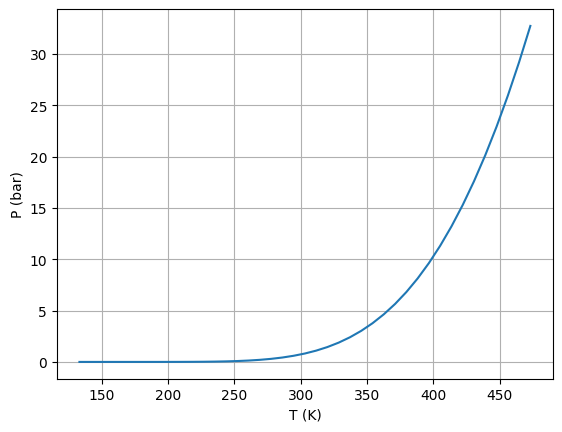

In [8]:
pressão_vapor_pentano = pd.read_csv("dados/pressão_vapor_pentano.txt").drop(0,axis=0).astype('float')
pressão_vapor_pentano.plot(x="Temperature",legend=False)
plt.ylabel("P (bar)")
plt.xlabel("T (K)")
plt.grid()
plt.show()

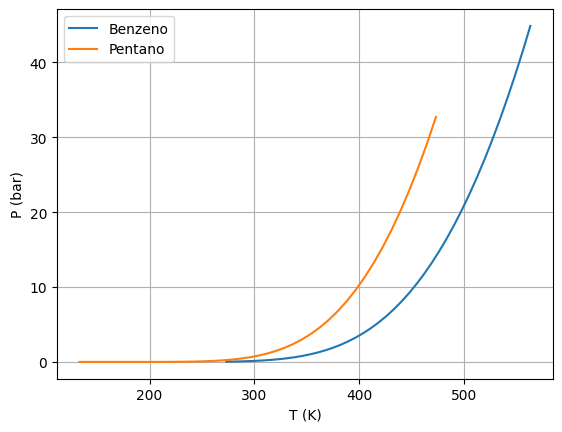

In [9]:
ax = pressão_vapor_benzeno.plot(x="Temperature")
pressão_vapor_pentano.plot(ax=ax,x="Temperature")
plt.legend(["Benzeno","Pentano"])
plt.ylabel("P (bar)")
plt.xlabel("T (K)")
plt.grid()
plt.show()

Com esses dados podemos realmente perceber que o pentano é mais volátil, assim facilitando a separação.

Dado este problema criamos um código que separa a mistura em qualquer concentração do benzeno, utilizando os dados do diagrama de fase da mistura.

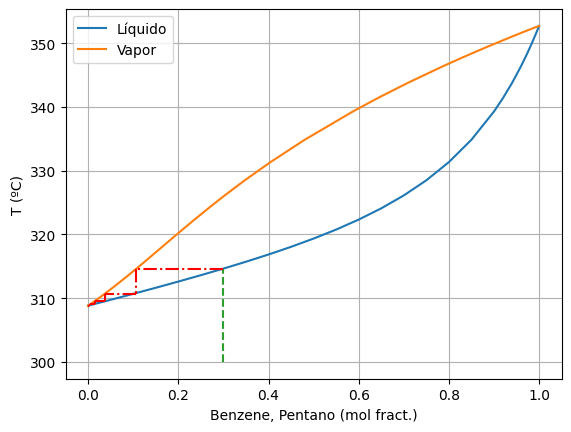

É nescessario fazer 7 destilações para ter uma concentração de menos ou igual a 0, começando com 0.3 de concentração.


,Temperatura,x1,x2
0,314.650,0.300000,0.700000
1,310.689,0.107056,0.892944
2,309.569,0.036464,0.963535
3,309.016,0.014807,0.985193
4,308.906,0.003734,0.996266
5,308.852,0.001497,0.998503
6,308.823,0.000374,0.999626
7,308.823,0.000000,1.000000


In [10]:
def achar_y(x):
    """Acha o valor do y mais perto a partir do valor de x do gráfico.
    Args: 
        x: valor do x do gráfico.
    Returns:
        y do gráfico."""
    linha = " x1 "

    lista_modificada = abs(df_diagrama[linha].values - x)
    index = list(lista_modificada).index(lista_modificada.min())
    return df_diagrama["Temperature"][index]


def achar_x(y):
    """Acha o valor do x mais perto a partir do valor de y do gráfico.
    Args: 
        y: valor do y do gráfico.
    Returns:
        y do gráfico."""
    linha = " y1"

    lista_modificada = abs(df_diagrama["Temperature"].values - y)
    index = list(lista_modificada).index(lista_modificada.min())
    return df_diagrama[linha][index]


def plot_batch_distillation(consentração, limite=100, salvar=False, erro=0.04):
    """Plota o esquema da destilação para a mistura, benzeno e pentano, em qualquer consentração molar do benzeno.
    Args:
        Consentração: Consentração molar do benzeno, em float.
        Limite: limite de destilações realizadas, por padão o maximo é 100.
        salvar: Salvar imagem do esquema da destilação, deixa a função mais lenta.
        erro: O valor minimo que a concentração do benzeno deve parar para parar as interções.
    Returns:
        vezes: quantas destilações precisa ser feitas.
        Tabela: Tabela com os dados das destilações."""
    plt.plot(
        df_diagrama[" x1 "].values, df_diagrama["Temperature"].values, label="Líquido"
    )
    plt.plot(
        df_diagrama[" y1"].values, df_diagrama["Temperature"].values, label="Vapor"
    )
    plt.ylabel("T (ºC)")
    plt.xlabel("Benzene, Pentano (mol fract.)")
    y1 = achar_y(consentração)
    plt.plot([consentração, consentração], [300, y1], "--")
    x1 = consentração
    vezes = 0
    Dados = [[], [], []]
    for _ in range(limite):
        Dados[0].append(y1)
        Dados[1].append(x1)
        Dados[2].append(1 - x1)
        x2 = achar_x(y1)
        plt.plot([x1, x2], [y1, y1], "r-.")  # horizontal
        y2 = achar_y(x2)
        plt.plot([x2, x2], [y1, y2], "r-.")  # vertical
        x1 = x2
        y1 = y2
        vezes += 1
        if x1 <= erro:
            break
    Dados[0].append(y1)
    Dados[1].append(x1)
    Dados[2].append(1 - x1)
    plt.legend()
    plt.grid()
    plt.savefig("imagem/destilação.png", dpi=1200) if salvar else None
    plt.show()
    tabela = pd.DataFrame({"Temperatura": Dados[0], "x1": Dados[1], "x2": Dados[2]})
    return vezes, tabela

conce = 0.3
erro = 0
vezes, tabela = plot_batch_distillation(conce, erro=erro)
print(
    f"É nescessario fazer {vezes} destilações para ter uma concentração de menos ou igual a {erro}, começando com {conce} de concentração."
)
tabela

A partir desses dados é possivel notar que com apenas 7 destilzações podemos separar o pentano, e assim ter o elemento puro no final da destilação.

A partir da tabela da destição podemos calcular qual a fração molar do pentano puro, sabendo que iniciamos a mistura com 0.7 frac.mol iremos ter uma mistura pura com 0.842 vezes a quantidade de mol de pentano que tinha na mistura.

In [11]:
valores_taxa = tabela["x2"].values
taxa = 1
for i in valores_taxa[1:]:
    taxa *= i
print(f"O fração molar do pentano é {taxa} mol frac.")

O fração molar do pentano é 0.8428985898927762 mol frac.


----
### Conclusão
Nessa etapa do projeto, definimos o volume total da mistura e o de cada componente, a densidade total da mistura e a pressão de vapor do sistema e as condições de separação. A pressão de vapor será utilizada para entender quanto o contêiner terá que aguentar quando o pentano liquido evaporar e se tornar gás.

Primeiro, nos concentramos em determinar o volume da mistura, de 0,3 frac mol de benzeno, e dos compostos. Para isso, precisamos da densidade da mistura, mas, como não tínhamos como calcular a densidade dos elementos, calculamos a partir das densidades dos elementos, e chegamos no resultado de 2,92 kg/m³ para a densidade da mistura.

Depois de ter a densidade calculada, podemos, calculamos o volume total, obtendo 17,29 para o pentano, 8,02 para o benzeno e 25,31 para a mistura total, todos em m³/mol.

Após o cálculo do volume separamos a mistura utilizando a destilação em lotes, e com ela percebemos que precisamos realizar 7 destilações para ter o pentano puro.

Para calcular a destilação também utilizamos a pressão de vapor de cada elemento para descobrir o mais volátil, e já tendo esses dados iremos utilizá-los no próximo desafio para calcular se o tanque irá aguentar a pressão. 

-----

## Referências

[1] Schroeder, Daniel V. (2000). An introduction to thermal physics. San Francisco, CA: Addison Wesley. 

[2] MILLER, Bruce G. Clean Coal Technologies for Advanced Power Generation. In: MILLER, Bruce G. Clean Coal Engineering Technology. Butterworth-Heinemann, 2011. p. 251-300.

[2] Benzene. Disponível em: <https://webbook.nist.gov/cgi/inchi?ID=C71432&Mask=2>. Acesso em: 22 mar. 2023.

[3] Pentane. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C109660&Mask=1>. Acesso em: 22 mar. 2023.

[4] McQuarrie, Donald A. (Donald Allan). Physical Chemistry : a Molecular Approach. Sausalito, Calif. University Science Books, 1997.

[5] PANFILOV, Mikhail; KOLDOBA, Alexandre. Kelvin’s Dissymmetric Models and Consistency Conditions of Multicomponent Gas-Liquid Equilibrium and Capillary Condensation. Journal of Thermodynamics, v. 2016, p. 1–21, 2016. Disponível em: <https://www.hindawi.com/journals/jther/2016/3806364/>. Acesso em: 22 mar. 2023. 

[6] Calculation of vapor-liquid equilibrium (VLE) and drawing of phase diagrams. Disponível em: <http://www.vle-calc.com/phase_diagram.html>. Acesso em: 19 de Abril, 2023.

[7] Isothermal Properties for Pentane. Disponível em: <https://webbook.nist.gov/cgi/fluid.cgi?T=309.2&PLow=&PHigh=&PInc=&Digits=5&ID=C109660&Action=Load&Type=IsoTherm&TUnit=K&PUnit=MPa&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF>. Acesso em: 19 de Abril, 2023.

[8]Isothermal Properties for Benzene. Disponível em: <https://webbook.nist.gov/cgi/fluid.cgi?T=353.3&PLow=&PHigh=&PInc=&Digits=5&ID=C71432&Action=Load&Type=IsoTherm&TUnit=K&PUnit=MPa&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF>. Acesso em: 19 de Abril, 2023.

[9] Pentane - Thermophysical Properties. Disponível em: <https://www.engineeringtoolbox.com/pentane-properties-d_2048.html> 

[10] Benzene - Thermophysical Properties. Disponível em: <https://www.engineeringtoolbox.com/benzene-benzol-properties-d_2053.html> Acesso em: 19 de Abril, 2023.

----

## Terceiro desafio

No desafio anterior, obtivemos os parâmetros de volume total da mistura e de cada componente, a densidade total da mistura, a pressão de vapor do sistema e as condições de separação das suas substâncias. Definimos então que a substância purificada após a destilação que utilizaremos será o Pentano, logo, todos os cálculos realizados nesse desafio serão com essa substância.

Para esse desafio, o objetivo é estabelecermos as condições de combustão e as reações que a descrevem, para isso, vamos considerar: 
* Os potenciais termodinâmicos (energia interna, entalpia, energia livre de Gibbs) envolvidos na reação de combustão;
* A entropia envolvida na reação de combustão;
* A equação de estado a ser usada para o sistema.

Todos esses conceitos serão importantes para descrever o sistema e identificar a quantidade de energia que poderá ser transferida para o boiler numa próxima etapa. 



---

Não utilizamos nesse momento, porêm como é uma propiedade interessante o Cp do pentano está aqui.

In [12]:
def separar(tabela):
    """Separa o erro da coluna 'Cp gas (J/mol*K)' e coloca em outra coluna, substituindo os valores inesistentes para 0.
    Arg:
        tabela: A tabela que será modificada."""
    separado = [tabela["Cp gas (J/mol*K)"][i].split(" ± ") for i in range(len(tabela))]
    erro = []
    certo = []
    for item in separado:
        erro.append(item[1] if len(item) == 2 else 0)
        certo.append(item[0])
    tabela["erro"] = erro
    tabela["Cp gas (J/mol*K)"] = certo

    tabela["Cp gas (J/mol*K)"] = pd.to_numeric(tabela["Cp gas (J/mol*K)"])
    tabela["erro"] = pd.to_numeric(tabela["erro"])

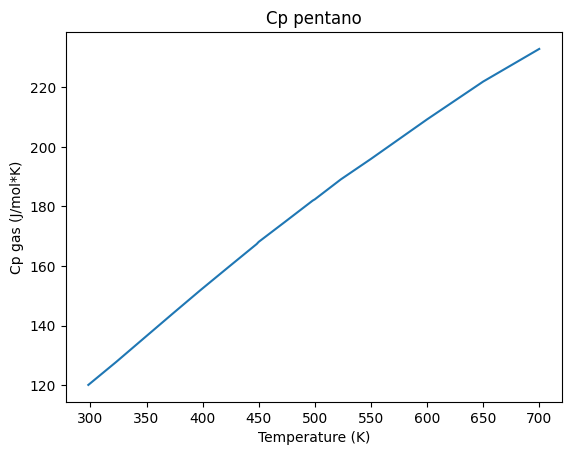

,Cp gas (J/mol*K),Temperature (K),erro
0,120.07,298.15,0.24
1,127.84,323.15,0.26
2,135.90,348.15,0.27
3,143.95,373.15,0.29
4,151.92,398.15,0.30
5,159.67,423.15,0.32
6,167.37,448.15,0.33
7,168.11,450.00,0.00
8,174.75,473.15,0.35
9,181.98,498.15,0.36


In [13]:
tabela_cp_1 = pd.read_csv("dados/cp_benzene_1.txt", delimiter=",")
##############
# Separando erro
separar(tabela_cp_1)
################################################################
# Plot
tabela_cp_1.plot(x="Temperature (K)", y="Cp gas (J/mol*K)", legend=False)
plt.ylabel("Cp gas (J/mol*K)")
plt.title("Cp pentano")
plt.show()
tabela_cp_1

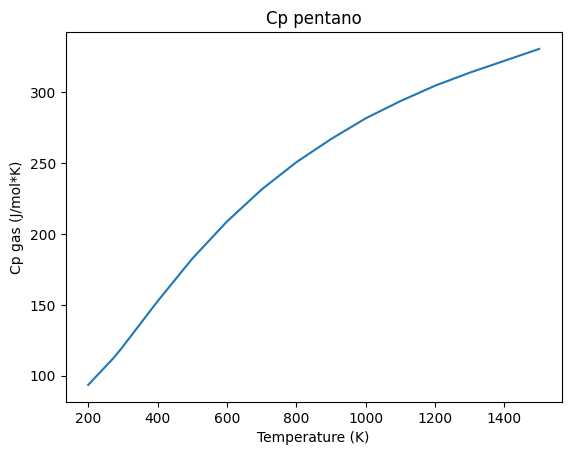

,Cp gas (J/mol*K),Temperature (K),erro
0,93.55,200.00,0.0
1,112.55,273.15,0.0
2,120.00,298.15,0.1
3,120.62,300.00,0.0
4,152.55,400.00,0.0
5,182.59,500.00,0.0
6,208.78,600.00,0.0
7,231.38,700.00,0.0
8,250.62,800.00,0.0
9,266.94,900.00,0.0


In [14]:
tabela_cp_2 = pd.read_csv("dados/cp_benzene_2.txt", delimiter=",")
##############
# Separando erro
separar(tabela_cp_2)
################################################################
# Plot
tabela_cp_2.plot(x="Temperature (K)", y="Cp gas (J/mol*K)", legend=False)
plt.ylabel("Cp gas (J/mol*K)")
plt.title("Cp pentano")
plt.show()
tabela_cp_2

### Os potenciais termodinâmicos:

Os potenciais termodinâmicos são as equações que nos ajudam a descrever o comportamento de um sistema, o trabalho que esse sistema pode realizar, sua tendência para o equilíbrio termodinâmico e propriedades termodinâmicas.  eles dãi informações sobre quantidades de energia propriedades termodinâmicas.

Dessa forma, calculando os potenciais termodinâmicos, conseguiremos encontrar as informações que descrevem a combustão e a energia útil que teremos disponível no sistema para aplicar no ciclo Rankine posteriormente.  

---
#### Entalpia da reação de combustão:

A entalpia é uma grandeza termodinâmica que mede a quantidade de energia transferida como trabalho durante uma reação ou processo químico. 
A entalpia que é relevante para esse estudo é a entalpia de combustão. Essa medida nos dá o calor transferido da combustão para o ciclo, ou seja, é uma medida da quantidade de energia liberada ou absorvida durante a combustão de uma substância em condições específicas.

Para calcular a entalpia de reação de combustão, é necessário identificar a entalpia dos reagentes e a entalpia de formação dos produtos. No livro Physical Chemistry: A Molecular Approach, o autor apresenta a entalpia de reação como:
$$ Δ_rH = yΔ_fH°[Y] + zΔ_fH°[Z] -aΔ_FH°[A] - bΔ_FH°[B] \,\,\,\text{[5]}$$ 

sendo $a, b$ os coeficientes que mostram o número de mols dos reagentes e $y, z$ os número de mols dos produtos. Dessa forma, para uma reação de combustão com pentano teremos

$$a C_5H_{12} + b O_2 → c CO_2 + d H_2O$$
$$C_5H_{12} + 8 O_2 → 5 CO_2 + 6 H_2O.$$

Agora, identificamos a entalpia de reação dos reagentes e a entalpia de formação dos produtos para acrescentar na fórmula. Para os elementos a 25°C (298K) e pressão de 1 bar,

$$ 1 (-3535) + 8 (0) → 5 (-393) + 6 (-241.8) \,\,\,\text{[5][12][13]}$$ 


$$ Δ_rH = 5(-393.509)[CO_2] + 6  (-241.8)[H_2O] - 1 (-3535)[C_5H_{12}] - 8 * 0[O_2]$$

Nesse caso, consideramos a entalpia de reação do $O_2$ como zero para fins referenciais. A partir da fórmula acima, 
$$Δ_rH = −2219.9 kJ/mol.$$

Portanto, a entalpia de reação de combustão para o pentano é de -2219.9 kJ/mol. Esse valor de entalpia negativa, indica a que a reação libera calor na quantidade de -2219.9 kJ por mol de pentano queimado. Esse valor nos indica quanto calor poderemos transferir para o ciclo rankine. Dessa forma, temos a quantidade de energia liberada quando o pentano é queimado nessas condições específicas.

---
#### Entropia de Reação de combustão:
Podemos calcular a entropia de reação de forma semelhante a que calculamos a entalpia da reação de combustão. A partir do livro Physical Chemistry: A Molecular Approach, a partir de uma reação

$$ a A + b B --> yY +zZ $$

podemos calcular a entropia que ocorre em reações químicas. Dessa forma, conseguiremos entender se a enropia aumenta, diminui ou se mantém durante a combustão do pentano. A fórmula que utilizaremos é dada por [5]
$$Δ_rS° = yS°[Y] + zS°[Z] - aS°[A] - bS°[B]$$

Então,  temos os valores de entropia de reação e formação dados por $S°(C_5H_{12}) = 269.8 J/(mol*K)$ [4], $S°(O2) = 205.1 J/(mol*K)$ [14], $S°(CO2) = 213.8 J/(mol*K)$ [12], $S°(H_2O) = 188.8 J/(mol*K)$ [13]. 
Substituindo esses valores, temos para a combustão de um mol de Pentano:

$$ΔS_comb = 5 S°[(CO2)] + 6 S°[(H2O)] - S°[(C5H12)] + 8S°[(O2)]$$
$$ΔS_comb = [5 * 213.8 + 6 * 188.7] - [269.8 + 8 * 205.0]$$
$$ΔS_comb = 221.4 J/(mol*K)$$

A segunda lei da termodinâmica afirma que a entropia total do universo sempre aumenta em uma reação espontânea. Dessa forma, esse valor positivos de entropia indica que a desordem do sistema aumentou.A entropia alta nos diz que esse sistema tem uma dispersão de energia térmica alta e menos realização de trabalho útil, o que nos mostra que esse é um bom combustível e libera energia na forma de calor que será útil para transferir para o ciclo Rankine.

---
#### Energia livre de Gibbs:
Para o nosso sistema, vamos utilizar a energia livre de Gibbs, isso porque faremos a combustão em um recipiente com paredes rígidas em que variaremos o volume e manteremos a pressão constante. Nesse caso, é indicado usar a energia livre de Gibbs. 
O que obtemos com a energia livre de Gibbs é a relação entre a entalpia (H) e a entropia (S) do sistema com sua capacidade de realizar trabalho útil, ou seja, a partir desse cálculo temos a energia utilizável do sistema, aquela que podemos converter em  trabalho ou calor. A equação da energia livre de Gibbs é:

$$ΔG = ΔH - TΔS$$

onde $ΔG$ é a variação da energia livre de Gibbs, $ΔH$ é a variação da entalpia, $T$ é a temperatura absoluta e $ΔS$ é a variação da entropia. Dessa forma para a reação de combustão do pentano, em uma temperatura inicial de 298 K, e a partir dos valores de entalpia e entropia calculados teremos

$$ΔG = ΔH - TΔS$$

$$ΔG=−2219.9 kJ/mol−(298 K)⋅(221.4 J/Kmol)$$


$$ΔG = − 2219.9 kJ/mol −  65977.2kJ/mol $$


$$ΔG= − 68197.1 kJ/mol.$$

O fato da energia livre de Gibbs ser negativo indica que essa reação ocorre espontâneamente, ou seja, para uma reação de combustão com o pentano, não precisaríamos adicionar energia ao sistema, ele aconteceria de forma natural. As moléculas dos reagentes, na presença de uma faísca, formariam naturalmente os produtos e liberariam energia na forma de calor, ou seja, a energia liberada pelo processo é maior do que a energia necessária para iniciar a reação.

---
Um  tópico interessante de discutir é o uso da energia livre de Gibbs (G) versus a energia livre de Helmholtz (A). Como descrito acima, G é dado quando temos pressão e temperatura constantes em contraste com A, que é dado para temperatura e volume constantes. 
Para o ponto de vista do que pretendemos fazer, trabalhar com A seria muito mais proveitoso, pois nesse processo, não perderíamos energia em forma de trabalho, toda a energia seria aproveitada em forma de calor, que é o objetivo. Do ponto de vista técnico, trabalhar com a energia livre de Helmholtz também é vantajoso,já que o recipiente em que ocorre a combustão seria de tamanho fixo. 
Apesar das vantagens, a energia livre de Helmholtz é muito mais difícil de medir experimentalmente, por exigir equipamentos que variem a pressão, o que causa escassez de dados. Por isso, só seria possível para nossa substância trabalhar com a energia livre de Gibbs. 


Outra relação interessante entre alguns dos potenciais termodinâmicos é a equivlência entre a energia interna e a energia livre de Gibbs. Para sistemas em que a temperatura e a pressão são constantes $G = U$. E podemos observar isso a partir de
$$ G = U - TS + PV$$
$$dG = dU - TdS - SdT + PdV - VdP $$
$$dG = dU - TdS + PdV $$
$$dG = dU - TdS + PdV $$
$$dG = q - PdV - TdS + PdV $$
$$dG = q  - TdS = dU$$

Mas, para o sistema em que estamos trabalhando, a pressão e a temperatura não são constantes, dito isso, não existe equivalência entre $G$ e $U$. Nesse caso, temos a diferenciação entre a energia total interna do sistema e a energia útil para ser utilizada do sistema. 

---
#### Energia interna:

A energia interna de um determinado sistema é a somatoria das energias desse sistema, incluindo a energia cinética e potencial das moléculas que o compõem. A energia interna é uma popriedade extensiva, depende de fatores que se sofrevem alguma modificação, como dobrar, ira ser sobrido na energia interna, por exemplo, se dobrar a massa a energia interna dobra. Ela pode ser calculada de diversas maneiras, uma dela é a utilização de outras propriedades como a entropia, que será o jeito que iremos utilizar.



$$U = \Delta H - V P$$

Sendo $U$ a energia interna do sistema, $\Delta H$ a variação da entropia, já calculada, $V$ o volume e $P$ a presão.

Como consideraremos que a destilação foi perfeita, portanto temos apenas o pentano no sistema, podemos utilizar a pressão parcial, que já temos, para saber a pressão do gas em determinada temperatura.

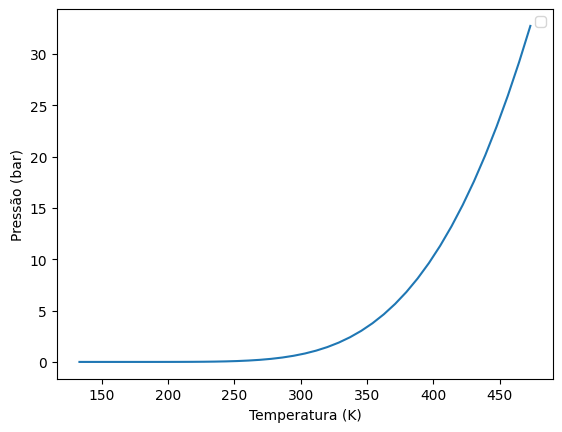

A presão em 298 K é 68626.743 Pa


In [15]:
pressão_vapor_pentano.plot(x="Temperature", y="Pressure")
plt.legend([])
plt.ylabel("Pressão (bar)")
plt.xlabel("Temperatura (K)")
plt.show()
x = pressão_vapor_pentano["Temperature"].values
y = pressão_vapor_pentano["Pressure"].values
pressão_298 = np.interp(298, x, y)
print(f"A presão em 298 K é {round(pressão_298*100000,3)} Pa")

Portanto tendo a presão podemos calcular o volume considerando que o Pentano é um gas ideal, assim:
$$PV = nRT$$
$$V= \frac{nRT}P$$
Sendo $V$ o volume, $P$ a pressão, que foi calculada, $n$ a quantidade de materia em mol, $R$ a constante dos gases ideais em J/(mol*K) e $T$ a temperatura, que iremos considerar igual da presão 298. 

Considerando que tinha 700g de pentano na mistura, podemos calcular o mol de pentano, sabendo que o peso molar é 72.1488g/mol, portanto:

In [16]:
mol_pentano = 700000 / 72.1488
print(f"Portanto a quantidade de pentano em mol é {round(mol_pentano,3)} mol")

Portanto a quantidade de pentano em mol é 9702.171 mol


Agora temos todos os valores nescessarios para calcular o volume.

In [17]:
T  = 298 #Temperatura
R = 8.314 #Constante dos gases ideais

volume = (mol_pentano*R*T)/(pressão_298*100000)
print(f"O volume é {round(volume,4)} m³")

O volume é 350.2691 m³


Agora podemos calcular a energia interna, sabendo que $$Δ_rH = -2219.9 kJ/mol.$$

In [18]:
U = -2219.9 - (pressão_298*100000)*volume
print(f"A variação da energia interna do sistema é {round(U,3)} J.")

A variação da energia interna do sistema é -24040047.279 J.


Outro modo que poderia ser utilizado para facilitar a conta seria a manipulação algebrica
$$U = \Delta H - PV$$
$$\begin{cases}U = \Delta H - PV\\ V = \frac{nRT}P\end{cases}$$
$$U = \Delta H - P\frac{nRT}P$$
$$U = \Delta H - nRT$$
Portanto:

In [19]:
U_novo = -2219.9 - (mol_pentano*R*T)
print(f"O valor de U calculado a partir da manipulação é {round(U_novo,3)} J")

O valor de U calculado a partir da manipulação é -24040047.279 J


Outro modo de calcular é calculando o volume pela equação de van der Waals, sabendo de os [valor](https://chem.libretexts.org/Ancillary_Materials/Reference/Reference_Tables/Atomic_and_Molecular_Properties/A8%3A_van_der_Waal's_Constants_for_Real_Gases) para o pentano é $a=19.13$ e $b=0.1451$, portanto
$$(P+\frac{n^2a}{V^2})(V-nb) = nRT$$


In [20]:
V = sympy.symbols("V", real=True)
a = 19.13
b = 0.1451
equacao = -mol_pentano*R*T + ((pressão_298*100000 + ((mol_pentano**2)*a)/(V**2))*(V - (mol_pentano*b)))

display(sympy.Eq(equacao, 0))
volume_vanderwalls = sympy.solve(equacao,V)

Eq((68626.7429411765 + 1800747521.52077/V**2)*(V - 1407.78502206551) - 24037827.3789723, 0)

In [21]:
U_vanderwalls = -2219.9 - (pressão_298*100000)*volume_vanderwalls[0]
print(f"A variação da energia interna do sistema é {round(U_vanderwalls,3)} J.")

A variação da energia interna do sistema é -120448713.869 J.


Porem com esse valor exorbitante da energia interna acreditamos que não é a melhor equação de estado para utilizar nesse cenario.

---

## Referências

[1] Schroeder, Daniel V. (2000). An introduction to thermal physics. San Francisco, CA: Addison Wesley. 

[2] MILLER, Bruce G. Clean Coal Technologies for Advanced Power Generation. In: MILLER, Bruce G. Clean Coal Engineering Technology. Butterworth-Heinemann, 2011. p. 251-300.

[3] Benzene. Disponível em: <https://webbook.nist.gov/cgi/inchi?ID=C71432&Mask=2>. Acesso em: 22 mar. 2023.

[4] Pentane. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C109660&Mask=1>. Acesso em: 22 mar. 2023.

[5] McQuarrie, Donald A. (Donald Allan). Physical Chemistry : a Molecular Approach. Sausalito, Calif. University Science Books, 1997.

[6] PANFILOV, Mikhail; KOLDOBA, Alexandre. Kelvin’s Dissymmetric Models and Consistency Conditions of Multicomponent Gas-Liquid Equilibrium and Capillary Condensation. Journal of Thermodynamics, v. 2016, p. 1–21, 2016. Disponível em: <https://www.hindawi.com/journals/jther/2016/3806364/>. Acesso em: 22 mar. 2023. 

[7] Calculation of vapor-liquid equilibrium (VLE) and drawing of phase diagrams. Disponível em: <http://www.vle-calc.com/phase_diagram.html>. Acesso em: 19 de Abril, 2023.

[8] Isothermal Properties for Pentane. Disponível em: <https://webbook.nist.gov/cgi/fluid.cgi?T=309.2&PLow=&PHigh=&PInc=&Digits=5&ID=C109660&Action=Load&Type=IsoTherm&TUnit=K&PUnit=MPa&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF>. Acesso em: 19 de Abril, 2023.

[9]Isothermal Properties for Benzene. Disponível em: <https://webbook.nist.gov/cgi/fluid.cgi?T=353.3&PLow=&PHigh=&PInc=&Digits=5&ID=C71432&Action=Load&Type=IsoTherm&TUnit=K&PUnit=MPa&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF>. Acesso em: 19 de Abril, 2023.

[10] Pentane - Thermophysical Properties. Disponível em: <https://www.engineeringtoolbox.com/pentane-properties-d_2048.html> 

[11] Benzene - Thermophysical Properties. Disponível em: <https://www.engineeringtoolbox.com/benzene-benzol-properties-d_2053.html> Acesso em: 19 de Abril, 2023.

[12] Carbon dioxide. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C124389&Mask=1#Thermo-Gas> Acesso em: 10 de Maio, 2023.

[13] Water. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=1#Thermo-Gas> Acesso em: 10 de Maio, 2023.


[14]Oxygen. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C7782447&Mask=1#Thermo-Gas> Acesso em: 10 de Maio, 2023.


## Quarto desafio:
Esse desafio será essencial para entendermos o funcionamento do ciclo Rankine. A partir do desafio 3, temos uma reação de combustão que fornecerá energia para o ciclo Rankine em uma da suas fases. 

- Considere um ciclo de Rankine ideal.
- Defina como funciona o ciclo de Rankine.
- Use valores de entalpia para água-vapor de água tabelados para cálculo da eficiência.
- Considere se o ciclo fosse de Carnot. Nesse caso, qual a eficiência teórica

Para isso vamos primeiro descrever o que será cada coisas.

<div style="text-align:center">
  <img src="imagem\Rankine_cycle.png" alt="Imagem do ciclo Rankine">
  Imagem do ciclo Rankine
</div>

- 1,2: Bomba de água, que eleva a pressão do líquido depois que sai do condensador.
- 2,3: Boiler, é responsável por aquecer a água e assim dar energia para o sistema.
- 3,4: Turbina, é onde o vapor passa para assim produzir energia.
- 4,1: Condensador, condensa a água depois que passa pela turbina, para tirar a energia acumulada.

Para calcular o ciclo rankine consideraremos apenas duas pressões, uma de 75KPa entre o condensador e a bomba e outra de 6MPa entre o boiler e a turbina.

Para todos os cálculos utilizaremos os dados do nist, o diagrama ts está neste [site](https://webbook.nist.gov/cgi/fluid.cgi?TLow=273.15&THigh=673.15&TInc=0.1&Digits=5&ID=C7732185&Action=Load&Type=SatP&TUnit=K&PUnit=MPa&DUnit=kg%2Fm3&HUnit=kJ%2Fkg&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF#Liquid)

In [22]:
try:
    liquid_phase_data, vapor_phase_data = [
        pd.read_csv(rf"dados/{nome}.csv")
        for nome in ["liquid_phase_data", "vapor_phase_data"]
    ]

except:
    # Faz a requisição HTTP para o site
    response = requests.get(
        "https://webbook.nist.gov/cgi/fluid.cgi?TLow=273.15&THigh=673.15&TInc=0.1&Digits=5&ID=C7732185&Action=Load&Type=SatP&TUnit=K&PUnit=MPa&DUnit=kg%2Fm3&HUnit=kJ%2Fkg&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF#Liquid"
    )
    html = response.content

    # Criando um objeto BeautifulSoup
    soup = BeautifulSoup(html, "html.parser")

    # Encontra todos os elementos com a classe "table-responsive"
    elements = soup.find_all(class_="small")
    for element, nome in zip(elements, ["liquid_phase_data", "vapor_phase_data"]):
        corpo = []
        tr_elements = element.find_all("tr")
        th_elements_thead = tr_elements[0].find_all("th")
        cabeçalho = [item.text for item in th_elements_thead]
        td_elements = [
            elemento_tbody.find_all("td") for elemento_tbody in tr_elements[1:]
        ]
        for linha in td_elements:
            linha_itens = []
            for item in linha:
                linha_itens.append(item.text)
            corpo.append(linha_itens)
        pd.DataFrame(corpo, columns=cabeçalho).to_csv(f"dados/{nome}.csv")
    liquid_phase_data, vapor_phase_data = [
        pd.read_csv(rf"dados/{nome}.csv")
        for nome in ["liquid_phase_data", "vapor_phase_data"]
    ]

In [24]:
dados_isobaricos_75 = pd.read_csv("dados/dados_isobaricos_75KPA.txt", sep="\t")
dados_isobaricos_6 = pd.read_csv("dados/dados_isobaricos_6MPA.txt", sep="\t")

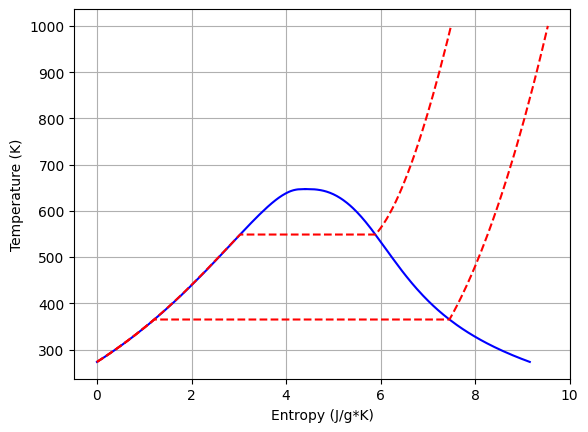

In [28]:
plt.plot(
    liquid_phase_data["Entropy (J/g*K)"], liquid_phase_data["Temperature (K)"], "b"
)
plt.plot(
    vapor_phase_data["Entropy (J/g*K)"], vapor_phase_data["Temperature (K)"], "b"
)
plt.plot(
    dados_isobaricos_75["Entropy (J/g*K)"], dados_isobaricos_75["Temperature (K)"], "--r"
)
plt.plot(
    dados_isobaricos_6["Entropy (J/g*K)"], dados_isobaricos_6["Temperature (K)"], "--r"
)

plt.xlabel("Entropy (J/g*K)")
plt.ylabel("Temperature (K)")
plt.grid()
plt.show()

Com isso já podemos saber que o primeiro valor, é onde tem a pressão de 75KPa na curva do liquido saturado.

In [33]:
index_1 = liquid_phase_data[liquid_phase_data["Pressure (MPa)"]<= 0.075].index[-1]

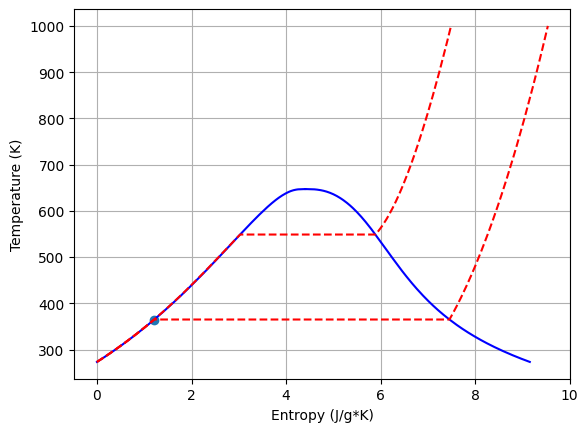

In [38]:
plt.plot(
    liquid_phase_data["Entropy (J/g*K)"], liquid_phase_data["Temperature (K)"], "b"
)
plt.plot(
    vapor_phase_data["Entropy (J/g*K)"], vapor_phase_data["Temperature (K)"], "b"
)
plt.plot(
    dados_isobaricos_75["Entropy (J/g*K)"], dados_isobaricos_75["Temperature (K)"], "--r"
)
plt.plot(
    dados_isobaricos_6["Entropy (J/g*K)"], dados_isobaricos_6["Temperature (K)"], "--r"
)
plt.scatter(
    liquid_phase_data["Entropy (J/g*K)"].loc[index_1], liquid_phase_data["Temperature (K)"].loc[index_1],
)

plt.xlabel("Entropy (J/g*K)")
plt.ylabel("Temperature (K)")
plt.grid()
plt.show()

Do ponto 1 para o ponto 2 não tem acressento de entropia, portanto o ponto onde a linha de 6MPa tem entropia igual ao ponto 1.

In [43]:
entropia1 = liquid_phase_data["Entropy (J/g*K)"].loc[index_1]
index_2 = dados_isobaricos_6[dados_isobaricos_6["Entropy (J/g*K)"]>=entropia1].index[0]

Portanto temos

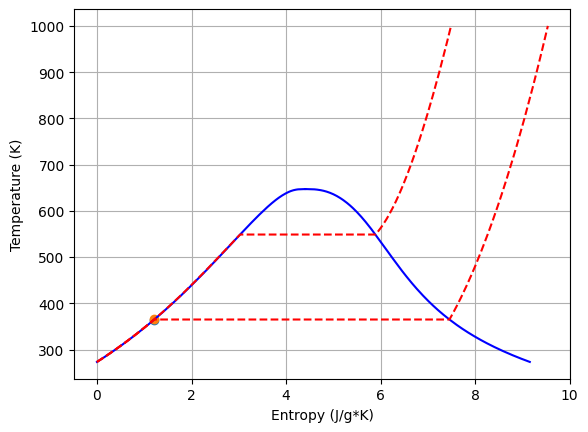

In [44]:
plt.plot(
    liquid_phase_data["Entropy (J/g*K)"], liquid_phase_data["Temperature (K)"], "b"
)
plt.plot(
    vapor_phase_data["Entropy (J/g*K)"], vapor_phase_data["Temperature (K)"], "b"
)
plt.plot(
    dados_isobaricos_75["Entropy (J/g*K)"], dados_isobaricos_75["Temperature (K)"], "--r"
)
plt.plot(
    dados_isobaricos_6["Entropy (J/g*K)"], dados_isobaricos_6["Temperature (K)"], "--r"
)
plt.scatter(
    liquid_phase_data["Entropy (J/g*K)"].loc[index_1], liquid_phase_data["Temperature (K)"].loc[index_1],
)
plt.scatter(
    dados_isobaricos_6["Entropy (J/g*K)"].loc[index_2], dados_isobaricos_6["Temperature (K)"].loc[index_2],
)

plt.xlabel("Entropy (J/g*K)")
plt.ylabel("Temperature (K)")
plt.grid()
plt.show()

É praticamante impossivel de ver, porêm está em outra linha de pressão.

Para encontrar o ponto 3, temos que descobrir quanto de água utilizaremos. Portanto usamos a formula.
$$Q = m\int^{t_f}_{t_i}cv dt$$
Utilizando o $Q$ como o $H$ de combustão que já descobrimos. 

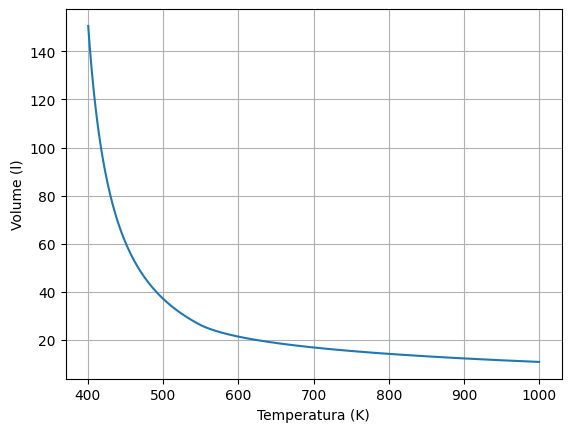

In [50]:
def massa_agua(lista_int, Q, df, inicial):
    massa_lista = []
    for int_max in lista_int:
        temps = df["Temperature (K)"][df["Temperature (K)"] <= int_max]
        temps = temps[df["Temperature (K)"] > inicial]
        cps = df["Cp (J/g*K)"][df["Temperature (K)"] <= int_max]
        cps = cps[df["Temperature (K)"] > inicial]

        massa = Q / np.trapz(cps, temps)
        massa_lista.append(massa/1000)
    return massa_lista

H = 2219.9 * mol_pentano  # valor errado, vou mudar

cond1 = dados_isobaricos_6["Temperature (K)"] > 400
temperatura_corte = dados_isobaricos_6["Temperature (K)"][cond1]
massa_corte = massa_agua(temperatura_corte, H, dados_isobaricos_6, dados_isobaricos_6["Temperature (K)"].loc[index_2])

plt.plot(temperatura_corte, massa_corte)
plt.ylabel("Volume (l)")
plt.xlabel("Temperatura (K)")
plt.grid()
plt.show()

In [64]:
index_3 = dados_isobaricos_6[dados_isobaricos_6["Temperature (K)"]>=600].index[0]
temp_maxima = dados_isobaricos_6["Temperature (K)"].loc[index_3]
massa_final = massa_agua([temp_maxima], H, dados_isobaricos_6, dados_isobaricos_6["Temperature (K)"].loc[index_2])
print(f"Utilizando uma massa de {massa_final[0]} Kg, chegamos a uma temperatura de {temp_maxima} K")

Utilizando uma massa de 21.327197942117344 Kg, chegamos a uma temperatura de 600.24 K


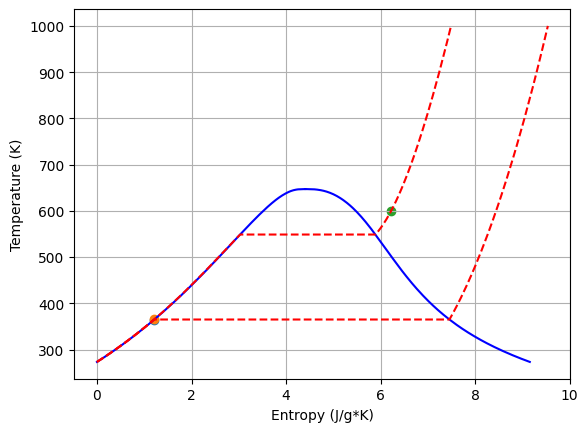

In [65]:
plt.plot(
    liquid_phase_data["Entropy (J/g*K)"], liquid_phase_data["Temperature (K)"], "b"
)
plt.plot(
    vapor_phase_data["Entropy (J/g*K)"], vapor_phase_data["Temperature (K)"], "b"
)
plt.plot(
    dados_isobaricos_75["Entropy (J/g*K)"], dados_isobaricos_75["Temperature (K)"], "--r"
)
plt.plot(
    dados_isobaricos_6["Entropy (J/g*K)"], dados_isobaricos_6["Temperature (K)"], "--r"
)
plt.scatter(
    liquid_phase_data["Entropy (J/g*K)"].loc[index_1], liquid_phase_data["Temperature (K)"].loc[index_1],
)
plt.scatter(
    dados_isobaricos_6["Entropy (J/g*K)"].loc[index_2], dados_isobaricos_6["Temperature (K)"].loc[index_2],
)
plt.scatter(
    dados_isobaricos_6["Entropy (J/g*K)"].loc[index_3], dados_isobaricos_6["Temperature (K)"].loc[index_3],
)

plt.xlabel("Entropy (J/g*K)")
plt.ylabel("Temperature (K)")
plt.grid()
plt.show()

E agora podemos saber o ponto 4, isso porque do ponto 3 para o quatro a entropia permanece constante.

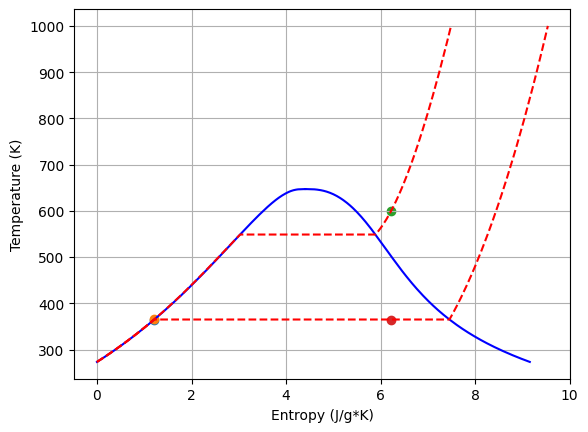

In [72]:
plt.plot(
    liquid_phase_data["Entropy (J/g*K)"], liquid_phase_data["Temperature (K)"], "b"
)
plt.plot(
    vapor_phase_data["Entropy (J/g*K)"], vapor_phase_data["Temperature (K)"], "b"
)
plt.plot(
    dados_isobaricos_75["Entropy (J/g*K)"], dados_isobaricos_75["Temperature (K)"], "--r"
)
plt.plot(
    dados_isobaricos_6["Entropy (J/g*K)"], dados_isobaricos_6["Temperature (K)"], "--r"
)
plt.scatter(
    liquid_phase_data["Entropy (J/g*K)"].loc[index_1], liquid_phase_data["Temperature (K)"].loc[index_1],
)
plt.scatter(
    dados_isobaricos_6["Entropy (J/g*K)"].loc[index_2], dados_isobaricos_6["Temperature (K)"].loc[index_2],
)
plt.scatter(
    dados_isobaricos_6["Entropy (J/g*K)"].loc[index_3], dados_isobaricos_6["Temperature (K)"].loc[index_3],
)
plt.scatter(
    dados_isobaricos_6["Entropy (J/g*K)"].loc[index_3], liquid_phase_data["Temperature (K)"].loc[index_1],
)

plt.xlabel("Entropy (J/g*K)")
plt.ylabel("Temperature (K)")
plt.grid()
plt.show()

Agora podemos calcular o trabalho na bomba, na turbina, calor da caldeira e o trabalho no condensador. 

Para o trabalho na bomba iremos calcular a entalpia do ponto 1 menos a entalpia do ponto 2.

In [ ]:
W_pump = (
    liquid_phase_data["Enthalpy (kJ/kg)"].loc[index_1]
    - dados_isobaricos_6["Enthalpy (kJ/kg)"].loc[index_2]
)
print(f"O trabalho na bomba é {W_pump}")

O trabalho na bomba é -6.46999999999997


Outro jeito de calcular é utilizando o volume especifico e as pressões.

In [78]:
w_pump_volume = liquid_phase_data["Volume (m3/kg)"].loc[index_1] * (0.075 - 6)
print(f"O trabalho na bomba é {w_pump_volume*1000}")

O trabalho na bomba é -6.1448175


Onde obtemos diferenças por causa das aproximações.

Para calcular o calor na caldeira é apenas subtrair a entalpia do ponto 3 pela a do ponto 2

In [80]:
q_boiler = dados_isobaricos_6["Enthalpy (kJ/kg)"].loc[index_3] - dados_isobaricos_6["Enthalpy (kJ/kg)"].loc[index_2]
print(f"O calor na caldeira é {q_boiler}")


O calor na caldeira é 2585.66


Para conseguir realizar o calculo do trabalho no ponto 4 temos que achar a fração de umidade do ponto.

In [83]:
s_g_index = vapor_phase_data[vapor_phase_data["Temperature (K)"]>= liquid_phase_data["Temperature (K)"].loc[index_1]].index[0]
s_g = vapor_phase_data["Entropy (J/g*K)"].loc[s_g_index]
s_f = liquid_phase_data["Entropy (J/g*K)"].loc[index_1]
x = (dados_isobaricos_6["Entropy (J/g*K)"].loc[index_3]- s_g)/(s_f-s_g)

Tendo o dado de x podemos calcular a entalpia no ponto 4.

In [85]:
h_g = vapor_phase_data["Enthalpy (kJ/kg)"].loc[s_g_index]
h_f = liquid_phase_data["Enthalpy (kJ/kg)"].loc[index_1]
h4 = h_g + x*(h_g-h_g)
print(f"A entalpia no ponto 4 é {h4}")

A entalpia no ponto 4 é 2662.2


Agora para calcular o trabalho temos:

In [91]:
w_turb = dados_isobaricos_6["Enthalpy (kJ/kg)"].loc[index_3]-h4
print(f"O trabalho é {w_turb}")

O trabalho é 313.8000000000002


Agora calculando a eficiencia temos:
$$n = 1-\frac{h_3-h_4}{h_3-h_2}$$

In [94]:
n = (h4-liquid_phase_data["Enthalpy (kJ/kg)"].loc[index_1])/(dados_isobaricos_6["Enthalpy (kJ/kg)"].loc[index_3]- dados_isobaricos_6["Enthalpy (kJ/kg)"].loc[index_2])
print(f"Portanto a eficiencia é de {n}")

Portanto a eficiencia é de 0.8811405985319029


## Referências

[1] Mech Engg Thermodynamics - Lec 19 - Vapor Power Cycles - YouTube. Disponível em: <https://www.youtube.com/playlist?list=PLj6j6tB7jyr-aghkuNgcxhC_Ym8RfcjFh>. Acesso em: 11 jun. 2023.

[2] Mech Engg Thermodynamics - Lec 20 - Rankine Cycle - YouTube. Disponível em: <https://www.youtube.com/playlist?list=PLj6j6tB7jyr9kKpjsrAUv3iVvMR--ps30>. Acesso em: 11 jun. 2023.

[3] Mech Engg Thermodynamics - Lec 21 - Rankine Cycle Example Problems - YouTube. Disponível em: <https://www.youtube.com/playlist?list=PLj6j6tB7jyr--PH5MZRqmi0ygdVYAOBnc>. Acesso em: 11 jun. 2023.